In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
cd gdrive

/content/gdrive


In [ ]:
cd MyDrive

/content/gdrive/MyDrive


In [ ]:
cd Colab datasets

/content/gdrive/MyDrive/Colab datasets


In [ ]:
# importing necessary libraries
import os

from nltk.corpus import stopwords
from nltk.util import ngrams

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import classification_report,confusion_matrix

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as mplot

from __future__ import division, print_function
from gensim import models
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Dropout, Reshape, Flatten, concatenate, Input, Conv1D, GlobalMaxPooling1D, Embedding
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import math

In [ ]:
Data = pd.read_csv("multilable_dataset.csv")
Data.head()

,commentText,facts,hypocrisy,warning,affiliation,denouncing,humor,positive_tone,hostile_language
0,kind god hates people curses kind people belie...,0,1,0,0,0,0,1,0
1,question comment racist jews smartest group pe...,0,0,0,0,0,0,1,0
2,israel fail nothing new israel rebellious nati...,0,0,0,0,0,0,1,0
3,god damned ignorant little prick doesnt know a...,0,0,0,0,0,0,0,1
4,shit may cooler police brutality people assumi...,0,1,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(Data, test_size=0.40, shuffle=True)
XTrain = train['commentText'].values
XTest = test['commentText'].values
 
labels=['facts', 'hypocrisy', 'warning', 'affiliation', 'denouncing', 'humor', 'positive_tone', 'hostile_language']
YTrain = train[labels]
YTest = test[labels]

In [ ]:
XTrain

array(['xxdonaldqxxx stupid animal sure ripping spirit apart word lol her word god quick powerful sharper wedged sword piercing even dividing asunder soul spirit joints marrow discerned thoughts intents heart',
       'slight lisp gay', 'animation life', ...,
       'rabbi minister stood flocks said go steal muslims goddess purify make holy hot goods fun temple church would swat teamed rabbiminister would prison life members would interrogated believe freedom speech statements consistent definition hate speech guy needs deported people follow need deported well',
       'would direct hatred toward apparent already hatred coming ears soothe appropriate response think laugh',
       'people people black know accent like black act british could'],
      dtype=object)

In [ ]:
XTest

array(['iam muslim guy saying complete utter ignorance dont put leaflet say insult guy agreed chats much shit started go back live iraq mate iraqis muslims talking ur antiseptic ur complete disgusting person point blank',
       'hindu born theres i wrong saying regardless born heaven become know allah go become reach cursed pure make buddhist slowminded kids people jewish said longer vision islamic purely pure make heres born christian jewish sins answer died born everything mercy rules oh responsible age parents right allah kid born religion kid applied baby means bullshit thats',
       'mean hate prophet try america preacher kill real listen false tells please cmon i i guy think labeled people i people preacher save herself guy get',
       ..., 'marbles lost completely wow woman',
       'homosexuals heterosexuals rival',
       'clearly manhunt blacks like dont even dont many bringing racist since colour attacks'],
      dtype=object)

In [ ]:
YTrain

,facts,hypocrisy,warning,affiliation,denouncing,humor,positive_tone,hostile_language
6322,0,0,0,0,0,0,0,1
25515,0,0,0,0,0,1,0,0
14701,0,0,0,0,0,0,0,1
17334,0,0,0,0,0,1,0,0
34230,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
3220,1,0,0,0,0,0,1,0
23631,0,0,0,0,1,0,0,1
3775,1,0,1,0,1,0,0,0
689,0,0,0,0,0,1,0,0


In [ ]:
YTest

,facts,hypocrisy,warning,affiliation,denouncing,humor,positive_tone,hostile_language
560,0,0,0,1,0,0,0,0
17328,0,0,0,0,0,0,1,0
25008,0,0,0,0,1,0,0,1
31551,0,0,0,0,0,0,0,1
4847,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
1456,0,0,0,0,0,1,0,0
22653,0,0,0,0,0,0,0,1
21794,0,0,0,0,0,1,0,0
29532,0,0,0,0,0,0,1,0


## Word2Vec

In [ ]:
import gensim
from gensim.models.word2vec import Word2Vec
LabeledSentence = gensim.models.doc2vec.LabeledSentence

In [ ]:
from gensim.models import Word2Vec
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

#  Reads text.txt file
f = open("text.txt", "w")
f.truncate(0)
for i in range(len(XTrain)):
  f.write(XTrain[i])
f.close()

sample = open("text.txt", "r")
s = sample.read()


# Replaces escape character with space
f = s.replace("\n", " ")
  
data = []
  
# iterate through each sentence in the file
for i in sent_tokenize(f):
    temp = []
    # tokenize the sentence into words
    for j in word_tokenize(i):
        temp.append(j.lower())
    data.append(temp)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
model_w2v = gensim.models.Word2Vec(
            data,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=5, # Ignores all words with total frequency lower than 5.                                  
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 30, # no.of cores
            seed = 34) 

model_w2v.train(data, total_examples= len(XTrain), epochs=20)

(200000, 6449540)

In [ ]:
embeddings_index = {}
for w in model_w2v.wv.vocab.keys():
    embeddings_index[w] = model_w2v.wv[w]

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words=100000)
tokenizer.fit_on_texts(XTrain)
sequences = tokenizer.texts_to_sequences(XTrain)

In [ ]:
for x in XTrain[:5, ]:
    print(x)

xxdonaldqxxx stupid animal sure ripping spirit apart word lol her word god quick powerful sharper wedged sword piercing even dividing asunder soul spirit joints marrow discerned thoughts intents heart
slight lisp gay
animation life
humanity ago eve news break someone somebody adam years
spot ran wouldve


In [ ]:
length = []
for x in XTrain:
    length.append(len(x.split()))
max(length)

905

In [ ]:
length = []
for x in XTest:
    length.append(len(x.split()))
max(length)

977

In [ ]:
XTrain_seq = pad_sequences(sequences, maxlen=980)
XTrain_seq[:5]

array([[   0,    0,    0, ..., 1091, 9137,  246],
       [   0,    0,    0, ..., 3929, 6108,   13],
       [   0,    0,    0, ...,    0, 1910,   40],
       [   0,    0,    0, ...,  476,  550,  119],
       [   0,    0,    0, ..., 1801, 1450,  996]], dtype=int32)

In [ ]:
sequences_Test = tokenizer.texts_to_sequences(XTest)
XTest_seq = pad_sequences(sequences_Test, maxlen=980)
XTest_seq[:5]

array([[    0,     0,     0, ...,    39,   185,  2109],
       [    0,     0,     0, ...,   210,   262,    45],
       [    0,     0,     0, ..., 14030,    17,    12],
       [    0,     0,     0, ...,    24,    18,  3498],
       [    0,     0,     0, ...,  3346,  1902,   751]], dtype=int32)

In [ ]:
num_words = 100000
embedding_matrix = np.zeros((num_words, 200))
for word, i in tokenizer.word_index.items():
    if i >= num_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# CNN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.preprocessing import sequence

In [ ]:
model = Sequential()
model.add(Embedding(100000, 200, input_length=980))
model.add(Conv1D(64, 3, padding='valid', activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 980, 200)          20000000  
_________________________________________________________________
conv1d (Conv1D)              (None, 978, 64)           38464     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 489, 64)           0         
_________________________________________________________________
flatten (Flatten)            (None, 31296)             0         
_________________________________________________________________
dense (Dense)                (None, 250)               7824250   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 251       
Total params: 27,862,965
Trainable params: 27,862,965
Non-trainable params: 0
____________________________________________

In [ ]:
clasess = ['facts',	'hypocrisy', 'warning', 'affiliation', 'denouncing', 'humor', 'positive_tone', 'hostile_language']

### Facts

Epoch 1/10
161/161 - 219s - loss: 0.0918 - accuracy: 0.9632 - val_loss: 0.0538 - val_accuracy: 0.9861
Epoch 2/10
161/161 - 217s - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0581 - val_accuracy: 0.9876
Epoch 3/10
161/161 - 218s - loss: 9.6535e-04 - accuracy: 0.9998 - val_loss: 0.0577 - val_accuracy: 0.9878
Epoch 4/10
161/161 - 216s - loss: 4.7470e-04 - accuracy: 0.9999 - val_loss: 0.0636 - val_accuracy: 0.9875
Epoch 5/10
161/161 - 218s - loss: 2.9050e-04 - accuracy: 1.0000 - val_loss: 0.0681 - val_accuracy: 0.9875
Epoch 6/10
161/161 - 218s - loss: 1.8262e-04 - accuracy: 1.0000 - val_loss: 0.0659 - val_accuracy: 0.9875
Epoch 7/10
161/161 - 218s - loss: 1.2440e-04 - accuracy: 1.0000 - val_loss: 0.0680 - val_accuracy: 0.9877
Epoch 8/10
161/161 - 217s - loss: 8.1693e-05 - accuracy: 1.0000 - val_loss: 0.0683 - val_accuracy: 0.9873
Epoch 9/10
161/161 - 213s - loss: 1.5326e-04 - accuracy: 1.0000 - val_loss: 0.0737 - val_accuracy: 0.9870
Epoch 10/10
161/161 - 213s - loss: 1.4190e-04 - accura

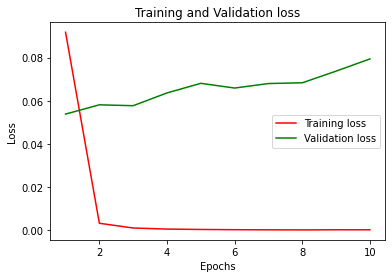

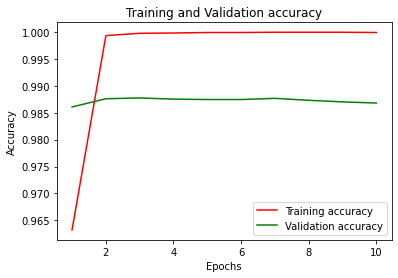

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12268
           1       0.95      0.92      0.94      1462

    accuracy                           0.99     13730
   macro avg       0.97      0.96      0.96     13730
weighted avg       0.99      0.99      0.99     13730



In [ ]:
history = model.fit(XTrain_seq, YTrain['facts'], validation_data=(XTest_seq, YTest['facts']), epochs=10, batch_size=128, verbose=2)

print('\nFinal training loss \t', history.history['loss'][-1])
print('Final training accuracy ', history.history['accuracy'][-1], '\n')

testLoss, testAccuracy = model.evaluate( XTest_seq, YTest['facts'])

print('\nTesting loss \t', testLoss)
print('Testing accuracy ', testAccuracy)

# plotting training and validation loss

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
mplot.plot(epochs, loss, color='red', label='Training loss')
mplot.plot(epochs, val_loss, color='green', label='Validation loss')
mplot.title('Training and Validation loss')
mplot.xlabel('Epochs')
mplot.ylabel('Loss')
mplot.legend()
mplot.show()

# plotting training and validation accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
mplot.plot(epochs, acc, color='red', label='Training accuracy')
mplot.plot(epochs, val_acc, color='green', label='Validation accuracy')
mplot.title('Training and Validation accuracy')
mplot.xlabel('Epochs')
mplot.ylabel('Accuracy')
mplot.legend()
mplot.legend()
mplot.show()

YPred = model.predict(XTest_seq)
for i in range(len(YPred)):
  if(YPred[i] > 0.5):
    YPred[i] = 1
  else:
    YPred[i] = 0

print(classification_report(YTest['facts'], YPred))

### Hypocrisy

Epoch 1/10
161/161 - 214s - loss: 0.1529 - accuracy: 0.9660 - val_loss: 0.1208 - val_accuracy: 0.9682
Epoch 2/10
161/161 - 213s - loss: 0.0157 - accuracy: 0.9949 - val_loss: 0.1110 - val_accuracy: 0.9732
Epoch 3/10
161/161 - 213s - loss: 0.0055 - accuracy: 0.9981 - val_loss: 0.1082 - val_accuracy: 0.9737
Epoch 4/10
161/161 - 213s - loss: 0.0030 - accuracy: 0.9988 - val_loss: 0.1553 - val_accuracy: 0.9734
Epoch 5/10
161/161 - 214s - loss: 0.0024 - accuracy: 0.9990 - val_loss: 0.1602 - val_accuracy: 0.9739
Epoch 6/10
161/161 - 215s - loss: 0.0020 - accuracy: 0.9992 - val_loss: 0.1312 - val_accuracy: 0.9749
Epoch 7/10
161/161 - 216s - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.1327 - val_accuracy: 0.9752
Epoch 8/10
161/161 - 216s - loss: 0.0013 - accuracy: 0.9995 - val_loss: 0.1347 - val_accuracy: 0.9744
Epoch 9/10
161/161 - 216s - loss: 9.5104e-04 - accuracy: 0.9996 - val_loss: 0.1403 - val_accuracy: 0.9744
Epoch 10/10
161/161 - 215s - loss: 7.3485e-04 - accuracy: 0.9997 - val_loss: 0

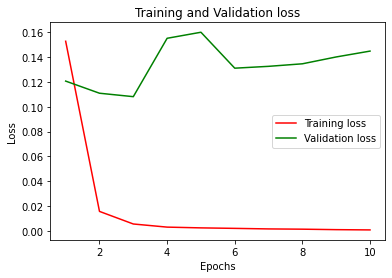

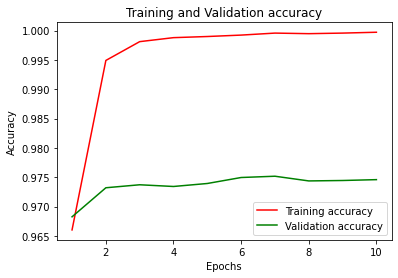

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     11689
           1       0.92      0.91      0.91      2041

    accuracy                           0.97     13730
   macro avg       0.95      0.95      0.95     13730
weighted avg       0.97      0.97      0.97     13730



In [ ]:
history = model.fit(XTrain_seq, YTrain['hypocrisy'], validation_data=(XTest_seq, YTest['hypocrisy']), epochs=10, batch_size=128, verbose=2)

print('\nFinal training loss \t', history.history['loss'][-1])
print('Final training accuracy ', history.history['accuracy'][-1], '\n')

testLoss, testAccuracy = model.evaluate( XTest_seq, YTest['hypocrisy'])

print('\nTesting loss  \t', testLoss)
print('Testing accuracy ', testAccuracy)

# plotting training and validation loss

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
mplot.plot(epochs, loss, color='red', label='Training loss')
mplot.plot(epochs, val_loss, color='green', label='Validation loss')
mplot.title('Training and Validation loss')
mplot.xlabel('Epochs')
mplot.ylabel('Loss')
mplot.legend()
mplot.show()

# plotting training and validation accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
mplot.plot(epochs, acc, color='red', label='Training accuracy')
mplot.plot(epochs, val_acc, color='green', label='Validation accuracy')
mplot.title('Training and Validation accuracy')
mplot.xlabel('Epochs')
mplot.ylabel('Accuracy')
mplot.legend()
mplot.legend()
mplot.show()

YPred = model.predict(XTest_seq)
for i in range(len(YPred)):
  if(YPred[i] > 0.5):
    YPred[i] = 1
  else:
    YPred[i] = 0

print(classification_report(YTest['hypocrisy'], YPred))

### Warning

Epoch 1/10
161/161 - 213s - loss: 0.3983 - accuracy: 0.8904 - val_loss: 0.2056 - val_accuracy: 0.9289
Epoch 2/10
161/161 - 212s - loss: 0.1052 - accuracy: 0.9610 - val_loss: 0.0879 - val_accuracy: 0.9704
Epoch 3/10
161/161 - 213s - loss: 0.0336 - accuracy: 0.9892 - val_loss: 0.0762 - val_accuracy: 0.9779
Epoch 4/10
161/161 - 213s - loss: 0.0155 - accuracy: 0.9953 - val_loss: 0.0877 - val_accuracy: 0.9775
Epoch 5/10
161/161 - 213s - loss: 0.0082 - accuracy: 0.9979 - val_loss: 0.0860 - val_accuracy: 0.9796
Epoch 6/10
161/161 - 213s - loss: 0.0051 - accuracy: 0.9988 - val_loss: 0.0945 - val_accuracy: 0.9786
Epoch 7/10
161/161 - 213s - loss: 0.0036 - accuracy: 0.9991 - val_loss: 0.0981 - val_accuracy: 0.9794
Epoch 8/10
161/161 - 214s - loss: 0.0030 - accuracy: 0.9993 - val_loss: 0.1036 - val_accuracy: 0.9779
Epoch 9/10
161/161 - 213s - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.1103 - val_accuracy: 0.9789
Epoch 10/10
161/161 - 213s - loss: 0.0017 - accuracy: 0.9997 - val_loss: 0.1175 - 

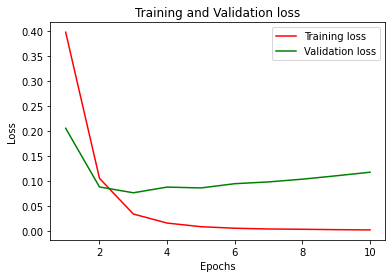

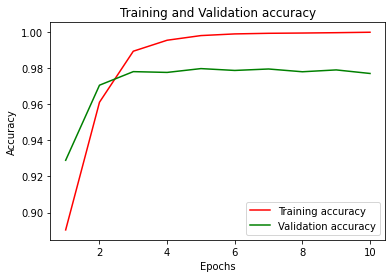

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12305
           1       0.89      0.89      0.89      1425

    accuracy                           0.98     13730
   macro avg       0.94      0.94      0.94     13730
weighted avg       0.98      0.98      0.98     13730



In [ ]:
history = model.fit(XTrain_seq, YTrain['warning'], validation_data=(XTest_seq, YTest['warning']), epochs=10, batch_size=128, verbose=2)

print('\nFinal training loss \t', history.history['loss'][-1])
print('Final training accuracy ', history.history['accuracy'][-1], '\n')

testLoss, testAccuracy = model.evaluate( XTest_seq, YTest['warning'])

print('\nTesting loss  \t', testLoss)
print('Testing accuracy ', testAccuracy)

# plotting training and validation loss

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
mplot.plot(epochs, loss, color='red', label='Training loss')
mplot.plot(epochs, val_loss, color='green', label='Validation loss')
mplot.title('Training and Validation loss')
mplot.xlabel('Epochs')
mplot.ylabel('Loss')
mplot.legend()
mplot.show()

# plotting training and validation accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
mplot.plot(epochs, acc, color='red', label='Training accuracy')
mplot.plot(epochs, val_acc, color='green', label='Validation accuracy')
mplot.title('Training and Validation accuracy')
mplot.xlabel('Epochs')
mplot.ylabel('Accuracy')
mplot.legend()
mplot.legend()
mplot.show()

YPred = model.predict(XTest_seq)
for i in range(len(YPred)):
  if(YPred[i] > 0.5):
    YPred[i] = 1
  else:
    YPred[i] = 0

print(classification_report(YTest['warning'], YPred))

### Affiliation

Epoch 1/10
161/161 - 216s - loss: 0.3608 - accuracy: 0.9109 - val_loss: 0.2467 - val_accuracy: 0.9195
Epoch 2/10
161/161 - 216s - loss: 0.1699 - accuracy: 0.9418 - val_loss: 0.1074 - val_accuracy: 0.9619
Epoch 3/10
161/161 - 215s - loss: 0.0522 - accuracy: 0.9812 - val_loss: 0.0693 - val_accuracy: 0.9796
Epoch 4/10
161/161 - 215s - loss: 0.0216 - accuracy: 0.9933 - val_loss: 0.0740 - val_accuracy: 0.9806
Epoch 5/10
161/161 - 215s - loss: 0.0114 - accuracy: 0.9966 - val_loss: 0.0737 - val_accuracy: 0.9830
Epoch 6/10
161/161 - 214s - loss: 0.0074 - accuracy: 0.9980 - val_loss: 0.0759 - val_accuracy: 0.9836
Epoch 7/10
161/161 - 215s - loss: 0.0051 - accuracy: 0.9988 - val_loss: 0.0806 - val_accuracy: 0.9838
Epoch 8/10
161/161 - 215s - loss: 0.0039 - accuracy: 0.9990 - val_loss: 0.0890 - val_accuracy: 0.9832
Epoch 9/10
161/161 - 214s - loss: 0.0029 - accuracy: 0.9991 - val_loss: 0.0909 - val_accuracy: 0.9832
Epoch 10/10
161/161 - 214s - loss: 0.0024 - accuracy: 0.9992 - val_loss: 0.0952 - 

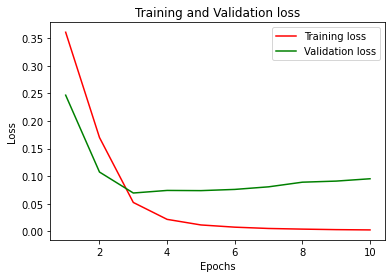

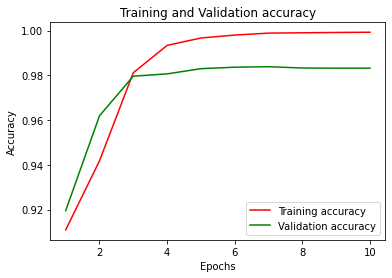

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12620
           1       0.92      0.87      0.89      1110

    accuracy                           0.98     13730
   macro avg       0.95      0.93      0.94     13730
weighted avg       0.98      0.98      0.98     13730



In [ ]:
history = model.fit(XTrain_seq, YTrain['affiliation'], validation_data=(XTest_seq, YTest['affiliation']), epochs=10, batch_size=128, verbose=2)

print('\nFinal training loss \t', history.history['loss'][-1])
print('Final training accuracy ', history.history['accuracy'][-1], '\n')

testLoss, testAccuracy = model.evaluate( XTest_seq, YTest['affiliation'])

print('\nTesting loss  \t', testLoss)
print('Testing accuracy ', testAccuracy)

# plotting training and validation loss

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
mplot.plot(epochs, loss, color='red', label='Training loss')
mplot.plot(epochs, val_loss, color='green', label='Validation loss')
mplot.title('Training and Validation loss')
mplot.xlabel('Epochs')
mplot.ylabel('Loss')
mplot.legend()
mplot.show()

# plotting training and validation accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
mplot.plot(epochs, acc, color='red', label='Training accuracy')
mplot.plot(epochs, val_acc, color='green', label='Validation accuracy')
mplot.title('Training and Validation accuracy')
mplot.xlabel('Epochs')
mplot.ylabel('Accuracy')
mplot.legend()
mplot.legend()
mplot.show()

YPred = model.predict(XTest_seq)
for i in range(len(YPred)):
  if(YPred[i] > 0.5):
    YPred[i] = 1
  else:
    YPred[i] = 0

print(classification_report(YTest['affiliation'], YPred))

### Denouncing

Epoch 1/10
161/161 - 214s - loss: 0.5717 - accuracy: 0.8036 - val_loss: 0.4611 - val_accuracy: 0.8051
Epoch 2/10
161/161 - 214s - loss: 0.3557 - accuracy: 0.8079 - val_loss: 0.3042 - val_accuracy: 0.8051
Epoch 3/10
161/161 - 213s - loss: 0.1983 - accuracy: 0.8989 - val_loss: 0.2012 - val_accuracy: 0.9245
Epoch 4/10
161/161 - 212s - loss: 0.0934 - accuracy: 0.9646 - val_loss: 0.1791 - val_accuracy: 0.9408
Epoch 5/10
161/161 - 212s - loss: 0.0518 - accuracy: 0.9813 - val_loss: 0.1718 - val_accuracy: 0.9481
Epoch 6/10
161/161 - 212s - loss: 0.0326 - accuracy: 0.9881 - val_loss: 0.1790 - val_accuracy: 0.9500
Epoch 7/10
161/161 - 213s - loss: 0.0240 - accuracy: 0.9908 - val_loss: 0.1954 - val_accuracy: 0.9497
Epoch 8/10
161/161 - 213s - loss: 0.0185 - accuracy: 0.9927 - val_loss: 0.2163 - val_accuracy: 0.9508
Epoch 9/10
161/161 - 212s - loss: 0.0155 - accuracy: 0.9942 - val_loss: 0.2228 - val_accuracy: 0.9494
Epoch 10/10
161/161 - 212s - loss: 0.0130 - accuracy: 0.9943 - val_loss: 0.2561 - 

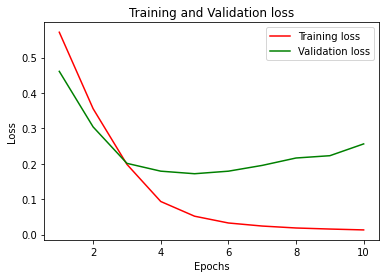

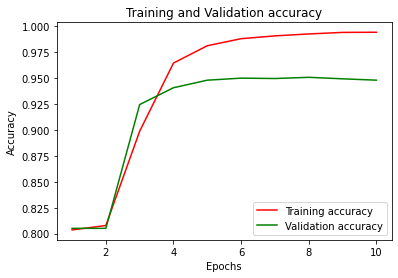

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11053
           1       0.91      0.81      0.86      2677

    accuracy                           0.95     13730
   macro avg       0.93      0.90      0.91     13730
weighted avg       0.95      0.95      0.95     13730



In [ ]:
history = model.fit(XTrain_seq, YTrain['denouncing'], validation_data=(XTest_seq, YTest['denouncing']), epochs=10, batch_size=128, verbose=2)

print('\nFinal training loss \t', history.history['loss'][-1])
print('Final training accuracy ', history.history['accuracy'][-1], '\n')

testLoss, testAccuracy = model.evaluate( XTest_seq, YTest['denouncing'])

print('\nTesting loss  \t', testLoss)
print('Testing accuracy ', testAccuracy)

# plotting training and validation loss

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
mplot.plot(epochs, loss, color='red', label='Training loss')
mplot.plot(epochs, val_loss, color='green', label='Validation loss')
mplot.title('Training and Validation loss')
mplot.xlabel('Epochs')
mplot.ylabel('Loss')
mplot.legend()
mplot.show()

# plotting training and validation accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
mplot.plot(epochs, acc, color='red', label='Training accuracy')
mplot.plot(epochs, val_acc, color='green', label='Validation accuracy')
mplot.title('Training and Validation accuracy')
mplot.xlabel('Epochs')
mplot.ylabel('Accuracy')
mplot.legend()
mplot.legend()
mplot.show()

YPred = model.predict(XTest_seq)
for i in range(len(YPred)):
  if(YPred[i] > 0.5):
    YPred[i] = 1
  else:
    YPred[i] = 0

print(classification_report(YTest['denouncing'], YPred))

### Humor

Epoch 1/10
161/161 - 212s - loss: 0.5186 - accuracy: 0.8272 - val_loss: 0.3421 - val_accuracy: 0.8559
Epoch 2/10
161/161 - 211s - loss: 0.2100 - accuracy: 0.9194 - val_loss: 0.1479 - val_accuracy: 0.9495
Epoch 3/10
161/161 - 213s - loss: 0.0669 - accuracy: 0.9768 - val_loss: 0.0979 - val_accuracy: 0.9658
Epoch 4/10
161/161 - 212s - loss: 0.0287 - accuracy: 0.9913 - val_loss: 0.0850 - val_accuracy: 0.9719
Epoch 5/10
161/161 - 212s - loss: 0.0168 - accuracy: 0.9954 - val_loss: 0.0904 - val_accuracy: 0.9712
Epoch 6/10
161/161 - 213s - loss: 0.0114 - accuracy: 0.9967 - val_loss: 0.0953 - val_accuracy: 0.9709
Epoch 7/10
161/161 - 213s - loss: 0.0088 - accuracy: 0.9979 - val_loss: 0.0967 - val_accuracy: 0.9721
Epoch 8/10
161/161 - 213s - loss: 0.0068 - accuracy: 0.9982 - val_loss: 0.0990 - val_accuracy: 0.9725
Epoch 9/10
161/161 - 214s - loss: 0.0059 - accuracy: 0.9983 - val_loss: 0.1073 - val_accuracy: 0.9723
Epoch 10/10
161/161 - 213s - loss: 0.0051 - accuracy: 0.9986 - val_loss: 0.1111 - 

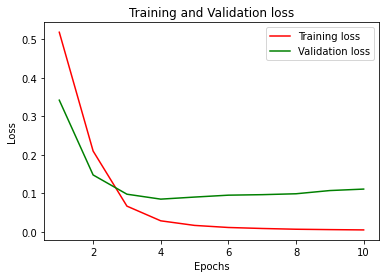

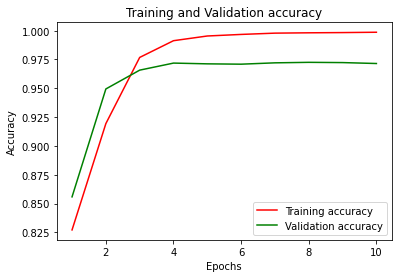

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11556
           1       0.93      0.89      0.91      2174

    accuracy                           0.97     13730
   macro avg       0.95      0.94      0.95     13730
weighted avg       0.97      0.97      0.97     13730



In [ ]:
history = model.fit(XTrain_seq, YTrain['humor'], validation_data=(XTest_seq, YTest['humor']), epochs=10, batch_size=128, verbose=2)

print('\nFinal training loss \t', history.history['loss'][-1])
print('Final training accuracy ', history.history['accuracy'][-1], '\n')

testLoss, testAccuracy = model.evaluate( XTest_seq, YTest['humor'])

print('\nTesting loss  \t', testLoss)
print('Testing accuracy ', testAccuracy)

# plotting training and validation loss

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
mplot.plot(epochs, loss, color='red', label='Training loss')
mplot.plot(epochs, val_loss, color='green', label='Validation loss')
mplot.title('Training and Validation loss')
mplot.xlabel('Epochs')
mplot.ylabel('Loss')
mplot.legend()
mplot.show()

# plotting training and validation accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
mplot.plot(epochs, acc, color='red', label='Training accuracy')
mplot.plot(epochs, val_acc, color='green', label='Validation accuracy')
mplot.title('Training and Validation accuracy')
mplot.xlabel('Epochs')
mplot.ylabel('Accuracy')
mplot.legend()
mplot.legend()
mplot.show()

YPred = model.predict(XTest_seq)
for i in range(len(YPred)):
  if(YPred[i] > 0.5):
    YPred[i] = 1
  else:
    YPred[i] = 0

print(classification_report(YTest['humor'], YPred))

### Positive_tone

Epoch 1/10
161/161 - 213s - loss: 0.4343 - accuracy: 0.8616 - val_loss: 0.3089 - val_accuracy: 0.8729
Epoch 2/10
161/161 - 213s - loss: 0.2053 - accuracy: 0.9099 - val_loss: 0.1638 - val_accuracy: 0.9349
Epoch 3/10
161/161 - 213s - loss: 0.0722 - accuracy: 0.9718 - val_loss: 0.1058 - val_accuracy: 0.9620
Epoch 4/10
161/161 - 213s - loss: 0.0278 - accuracy: 0.9912 - val_loss: 0.1103 - val_accuracy: 0.9639
Epoch 5/10
161/161 - 212s - loss: 0.0146 - accuracy: 0.9953 - val_loss: 0.0975 - val_accuracy: 0.9700
Epoch 6/10
161/161 - 212s - loss: 0.0097 - accuracy: 0.9972 - val_loss: 0.1070 - val_accuracy: 0.9705
Epoch 7/10
161/161 - 212s - loss: 0.0072 - accuracy: 0.9979 - val_loss: 0.1098 - val_accuracy: 0.9709
Epoch 8/10
161/161 - 212s - loss: 0.0060 - accuracy: 0.9981 - val_loss: 0.1157 - val_accuracy: 0.9723
Epoch 9/10
161/161 - 212s - loss: 0.0047 - accuracy: 0.9986 - val_loss: 0.1185 - val_accuracy: 0.9724
Epoch 10/10
161/161 - 212s - loss: 0.0040 - accuracy: 0.9988 - val_loss: 0.1256 - 

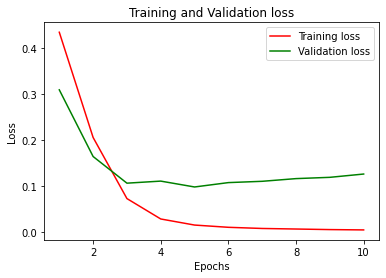

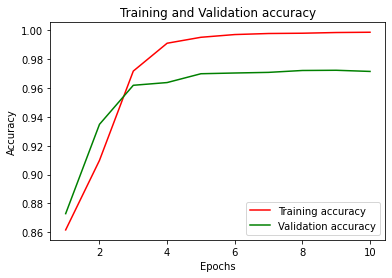

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11988
           1       0.92      0.85      0.88      1742

    accuracy                           0.97     13730
   macro avg       0.95      0.92      0.93     13730
weighted avg       0.97      0.97      0.97     13730



In [ ]:
history = model.fit(XTrain_seq, YTrain['positive_tone'], validation_data=(XTest_seq, YTest['positive_tone']), epochs=10, batch_size=128, verbose=2)

print('\nFinal training loss \t', history.history['loss'][-1])
print('Final training accuracy ', history.history['accuracy'][-1], '\n')

testLoss, testAccuracy = model.evaluate( XTest_seq, YTest['positive_tone'])

print('\nTesting loss  \t', testLoss)
print('Testing accuracy ', testAccuracy)

# plotting training and validation loss

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
mplot.plot(epochs, loss, color='red', label='Training loss')
mplot.plot(epochs, val_loss, color='green', label='Validation loss')
mplot.title('Training and Validation loss')
mplot.xlabel('Epochs')
mplot.ylabel('Loss')
mplot.legend()
mplot.show()

# plotting training and validation accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
mplot.plot(epochs, acc, color='red', label='Training accuracy')
mplot.plot(epochs, val_acc, color='green', label='Validation accuracy')
mplot.title('Training and Validation accuracy')
mplot.xlabel('Epochs')
mplot.ylabel('Accuracy')
mplot.legend()
mplot.legend()
mplot.show()

YPred = model.predict(XTest_seq)
for i in range(len(YPred)):
  if(YPred[i] > 0.5):
    YPred[i] = 1
  else:
    YPred[i] = 0

print(classification_report(YTest['positive_tone'], YPred))

### Hostile_language

Epoch 1/10
161/161 - 213s - loss: 0.7376 - accuracy: 0.7527 - val_loss: 0.3382 - val_accuracy: 0.8518
Epoch 2/10
161/161 - 213s - loss: 0.1679 - accuracy: 0.9336 - val_loss: 0.2232 - val_accuracy: 0.9130
Epoch 3/10
161/161 - 213s - loss: 0.0730 - accuracy: 0.9727 - val_loss: 0.2010 - val_accuracy: 0.9312
Epoch 4/10
161/161 - 213s - loss: 0.0406 - accuracy: 0.9858 - val_loss: 0.2141 - val_accuracy: 0.9326
Epoch 5/10
161/161 - 213s - loss: 0.0265 - accuracy: 0.9908 - val_loss: 0.2178 - val_accuracy: 0.9387
Epoch 6/10
161/161 - 212s - loss: 0.0191 - accuracy: 0.9933 - val_loss: 0.2329 - val_accuracy: 0.9380
Epoch 7/10
161/161 - 213s - loss: 0.0153 - accuracy: 0.9945 - val_loss: 0.2516 - val_accuracy: 0.9392
Epoch 8/10
161/161 - 213s - loss: 0.0123 - accuracy: 0.9953 - val_loss: 0.2674 - val_accuracy: 0.9374
Epoch 9/10
161/161 - 213s - loss: 0.0116 - accuracy: 0.9950 - val_loss: 0.2654 - val_accuracy: 0.9374
Epoch 10/10
161/161 - 214s - loss: 0.0097 - accuracy: 0.9960 - val_loss: 0.2873 - 

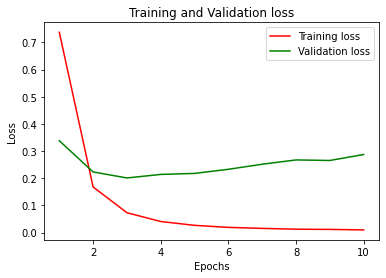

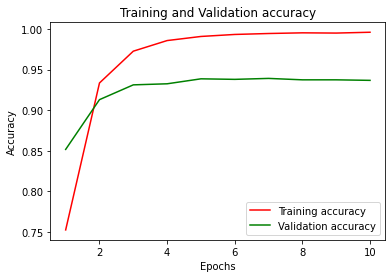

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      8281
           1       0.91      0.93      0.92      5449

    accuracy                           0.94     13730
   macro avg       0.93      0.94      0.93     13730
weighted avg       0.94      0.94      0.94     13730



In [ ]:
history = model.fit(XTrain_seq, YTrain['hostile_language'], validation_data=(XTest_seq, YTest['hostile_language']), epochs=10, batch_size=128, verbose=2)

print('\nFinal training loss \t', history.history['loss'][-1])
print('Final training accuracy ', history.history['accuracy'][-1], '\n')

testLoss, testAccuracy = model.evaluate( XTest_seq, YTest['hostile_language'])

print('\nTesting loss  \t', testLoss)
print('Testing accuracy ', testAccuracy)

# plotting training and validation loss

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
mplot.plot(epochs, loss, color='red', label='Training loss')
mplot.plot(epochs, val_loss, color='green', label='Validation loss')
mplot.title('Training and Validation loss')
mplot.xlabel('Epochs')
mplot.ylabel('Loss')
mplot.legend()
mplot.show()

# plotting training and validation accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
mplot.plot(epochs, acc, color='red', label='Training accuracy')
mplot.plot(epochs, val_acc, color='green', label='Validation accuracy')
mplot.title('Training and Validation accuracy')
mplot.xlabel('Epochs')
mplot.ylabel('Accuracy')
mplot.legend()
mplot.legend()
mplot.show()

YPred = model.predict(XTest_seq)
for i in range(len(YPred)):
  if(YPred[i] > 0.5):
    YPred[i] = 1
  else:
    YPred[i] = 0

print(classification_report(YTest['hostile_language'], YPred))